# Overview

This notebook explores daily rider data over 3.5 months in a particular geographic location. In particular, it plots average daily, weekday and monthly rider data.

# Load Libraries

In [1]:
#Import Libraries
import pandas as pd
import os
import sys
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns

plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams.update({'font.size': 15})
sns.set(font_scale=1.75)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#Change directory to project root directory
os.chdir("..")

In [4]:
#Import custom code
from src.data.CreateJupyterNotebookHeadings import jupyternotebookheadings1, jupyternotebookheadings2

In [7]:
jupyternotebookheadings2(['Logistic Regression','Gradient Boosting','Random Forest'],5)

* [5.1. Logistic Regression](#5.1.LogisticRegression)
* [5.2. Gradient Boosting](#5.2.GradientBoosting)
* [5.3. Random Forest](#5.3.RandomForest)
## 5.1. Logistic Regression <a class="anchor" id="5.1.LogisticRegression"></a>
## 5.2. Gradient Boosting <a class="anchor" id="5.2.GradientBoosting"></a>
## 5.3. Random Forest <a class="anchor" id="5.3.RandomForest"></a>


In [5]:
jupyternotebookheadings1(['Load Libraries & Data','Data Cleaning','Exploratory Data Analysis','Preprocessing','Model Training & Evaluation'])

* [1. Load Libraries & Data](#1.LoadLibraries&Data)
* [2. Data Cleaning](#2.DataCleaning)
* [3. Exploratory Data Analysis](#3.ExploratoryDataAnalysis)
* [4. Preprocessing](#4.Preprocessing)
* [5. Model Training & Evaluation](#5.ModelTraining&Evaluation)
## 1. Load Libraries & Data <a class="anchor" id="1.LoadLibraries&Data"></a>
## 2. Data Cleaning <a class="anchor" id="2.DataCleaning"></a>
## 3. Exploratory Data Analysis <a class="anchor" id="3.ExploratoryDataAnalysis"></a>
## 4. Preprocessing <a class="anchor" id="4.Preprocessing"></a>
## 5. Model Training & Evaluation <a class="anchor" id="5.ModelTraining&Evaluation"></a>


# Read & Process Data

In [2]:
#Read in data 
df=pd.read_json('data/raw/logins.json')

#Make a count column
df['count_']=1

#Make login_time the index
df=df.set_index('login_time')

#Resample Every 15 minutes
df=df.resample('15min').count()

#Make a new column for just the month
df['month']=[d for d in df.index.month]

#Make a new column for the week of the year
df['weekday']=[d for d in df.index.dayofweek]

#Make a new column for just the time of day
df['time_of_day']=[d.time() for d in df.index]

# Exploring All Data

In [16]:
#Return the time period with the most rides
df.count_.max(), df.count_.idxmax()

(73, Timestamp('1970-03-01 04:30:00', freq='15T'))

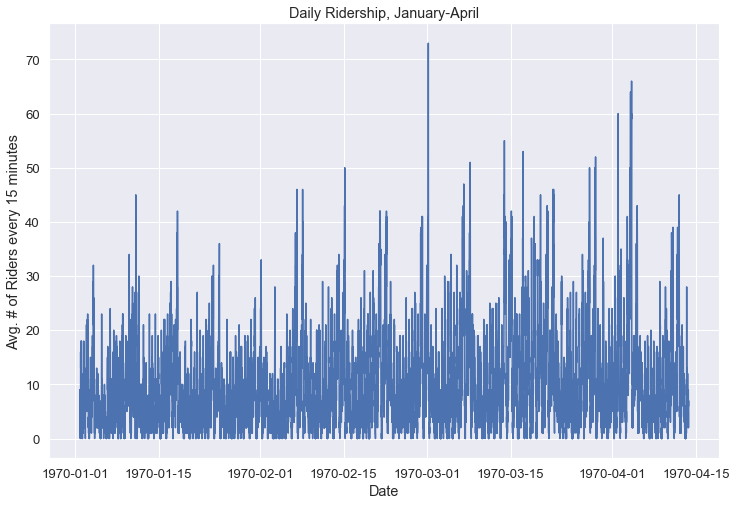

In [21]:
plt.plot(df.count_)
plt.ylabel('Avg. # of Riders every 15 minutes')
plt.xlabel('Date')
plt.title('Daily Ridership, January-April')
plt.show()

The data is quite noisy, but indicates daily cycles are present.

# Plotting Average Daily Data

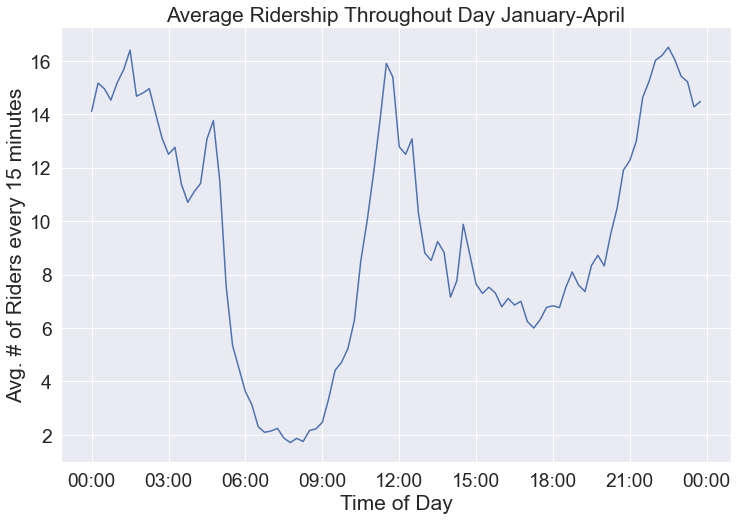

In [3]:
#Create a series with average ridership throughout each day
daily_mean=df.groupby('time_of_day').mean()

#Create labels for the x-axis (need to be in milliseconds)
x=[i*60*60*3 for i in range(0,9)]

#Plot the daily average for each day in the data
pd.plotting.register_matplotlib_converters()
plt.plot(daily_mean.count_)
plt.xticks(x)
plt.title('Average Ridership Throughout Day January-April')
plt.ylabel('Avg. # of Riders every 15 minutes')
sns.set_style(style='white')
plt.xlabel('Time of Day')
plt.show()

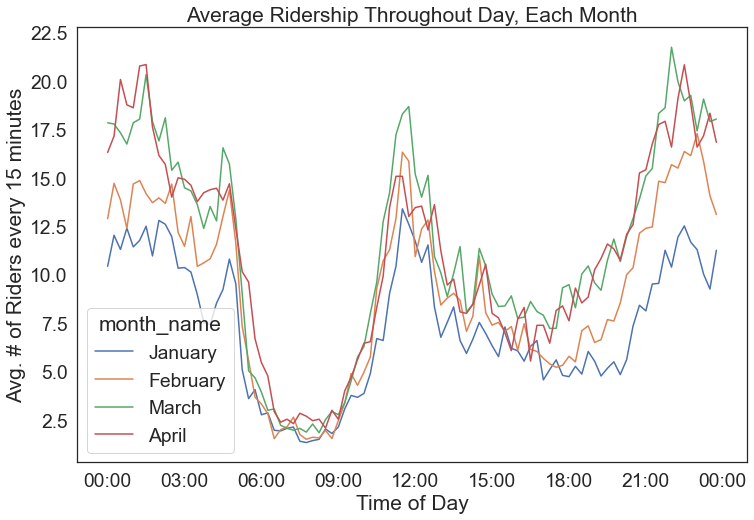

In [4]:
#Calculate average ridership throughout each day, for each month
monthly_daily_mean=pd.DataFrame(df.groupby(['time_of_day','month']).mean()).reset_index()

#Map month names onto values
month_map={1:'January',2:'February',3:'March',4:'April'}
monthly_daily_mean['month_name']=monthly_daily_mean.month.map(month_map)

#Plot the daily average for each month
sns.lineplot(y='count_',hue='month_name',x='time_of_day',data=monthly_daily_mean)
plt.title('Average Ridership Throughout Day, Each Month')
plt.ylabel('Avg. # of Riders every 15 minutes')
plt.xlabel('Time of Day')
sns.set_style(style='white')
plt.xticks(x)
plt.show()

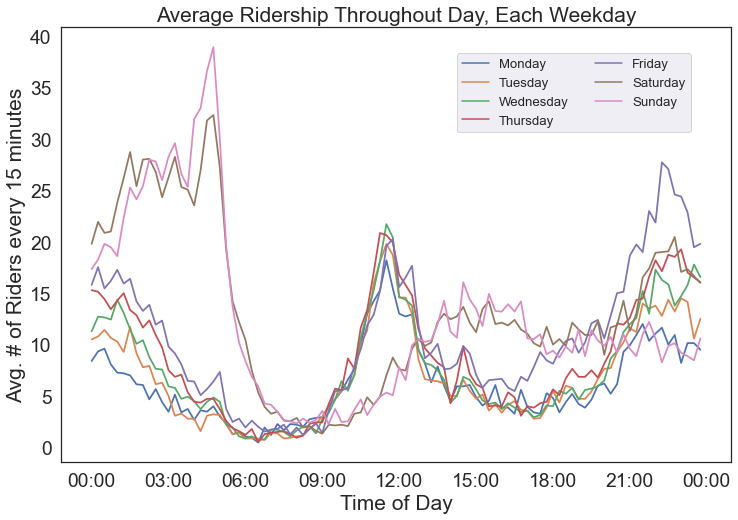

In [5]:
#Calculate average ridership throughout each day, for each weekday
weekday_mean=pd.DataFrame(df.groupby(['weekday','time_of_day',]).count_.mean()).reset_index()

#Map day of week onto values
weekday_map={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
weekday_mean['weekday_name']=weekday_mean.weekday.map(weekday_map)

#Plot the daily average for each month
sns.lineplot(y='count_',hue='weekday_name',x='time_of_day',data=weekday_mean,linewidth=1.75)
plt.title('Average Ridership Throughout Day, Each Weekday')
plt.ylabel('Avg. # of Riders every 15 minutes')
plt.xlabel('Time of Day')
sns.set_style(style='white')
sns.set(font_scale=1.2)
plt.legend(loc='center right', bbox_to_anchor=(0.95, 0.85), ncol=2)
plt.xticks(x)
plt.show()